In [1]:
import numpy as np
import pandas as pd

In [2]:
df_fake_news = pd.read_csv("dataset/ISOTNews/Fake.csv")
df_real_news = pd.read_csv("dataset/ISOTNews/True.csv")

In [3]:
print("Fake news", df_fake_news.shape)
print(df_fake_news.head())
print("Real news", df_real_news.shape)
print(df_real_news.head())

Fake news (23481, 4)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
Real news (21417, 4)
                                               title  \
0  As U.S. budget fight looms, Republicans

In [4]:
df_fake_news.groupby(['subject']).count().title

subject
Government News    1570
Middle-east         778
News               9050
US_News             783
left-news          4459
politics           6841
Name: title, dtype: int64

In [5]:
df_real_news.groupby(['subject']).count().title

subject
politicsNews    11272
worldnews       10145
Name: title, dtype: int64

In [6]:
df_fake_news["isFake"]=1
df_real_news["isFake"]=0

In [7]:
df_all_news = pd.concat([df_fake_news,df_real_news])

In [8]:
print(df_all_news.shape)

(44898, 5)


<AxesSubplot:ylabel='title'>

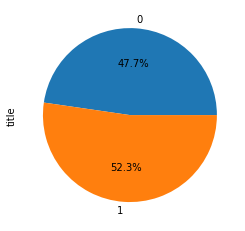

In [9]:
df_all_news.groupby('isFake').count().plot(kind='pie', y = 'title', autopct='%1.1f%%', legend = False)

In [10]:
print(df_all_news.shape)

(44898, 5)


In [11]:
df_all_news['title'].head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: title, dtype: object

In [12]:
def countAllCapitalWordInText(text):
    return np.sum([x.isupper() for x in text.split()])

In [13]:
df_all_news['numExclaimsInTitle'] =  df_all_news.title.str.count("!")
df_all_news['allCapsInTitle'] = df_all_news.title.apply(countAllCapitalWordInText)

In [14]:
df_all_news[df_all_news.isFake == 1].groupby('allCapsInTitle').count().title

allCapsInTitle
0     3008
1     4621
2     3923
3     3221
4     2562
5     2093
6     1432
7      867
8      497
9      336
10     166
11     157
12     135
13     116
14     138
15      81
16      42
17      32
18      25
19      10
20      10
21       3
23       4
24       2
Name: title, dtype: int64

In [15]:
df_all_news[df_all_news.isFake == 0].groupby('allCapsInTitle').count().title

allCapsInTitle
0    14073
1     6455
2      813
3       74
4        1
5        1
Name: title, dtype: int64

In [16]:
import nltk

print(df_all_news.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isFake  numExclaimsInTitle  allCapsInTitle  
0  December 31, 2017       1                   0               0  
1  December 31, 2017       1                   0               0  
2  December 30, 2017       1                   0               0  
3  Decembe

In [17]:

df_all_news['titleWordCount'] = df_all_news['title'].apply(lambda x: len(nltk.word_tokenize(x)))
df_all_news['textWordCount'] = df_all_news['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df_all_news['textSentenceCount'] = df_all_news['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
df_all_news.head()

,title,text,subject,date,isFake,numExclaimsInTitle,allCapsInTitle,titleWordCount,textWordCount,textSentenceCount
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,0,0,15,599,28
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,0,0,8,331,11
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,0,0,17,689,25
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,0,1,18,519,15
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,0,0,11,458,19


In [19]:
df_all_news = df_all_news[df_all_news['textWordCount']>0]

In [20]:
df_all_news.head()

,title,text,subject,date,isFake,numExclaimsInTitle,allCapsInTitle,titleWordCount,textWordCount,textSentenceCount
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,0,0,15,599,28
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,0,0,8,331,11
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,0,0,17,689,25
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,0,1,18,519,15
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,0,0,11,458,19


In [21]:
col = df_all_news.apply(lambda row: row.textWordCount / row.textSentenceCount, axis=1)
df_all_news = df_all_news.assign(averageWordCountInSentence = col.values)


In [22]:
print(df_all_news.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isFake  numExclaimsInTitle  allCapsInTitle  \
0  December 31, 2017       1                   0               0   
1  December 31, 2017       1                   0               0   
2  December 30, 2017       1                   0               0   
3  Dec

In [23]:
import textstat as st
df_all_news["readability"] = df_all_news["text"].apply(st.flesch_reading_ease)
print(df_all_news["readability"].head(10))

0    34.56
1    43.36
2    50.50
3    26.71
4    59.98
5    64.04
6    41.74
7    16.29
8    40.52
9    53.55
Name: readability, dtype: float64


In [26]:
from spellchecker import SpellChecker
spell = SpellChecker()
def countSpellingError(text):    
    error = 0
    tokens = nltk.word_tokenize(text)
    for token in tokens:
        if token.lower() not in spell:
            error +=1
    return error

In [27]:
df_all_news["spellings_error"] = df_all_news["text"].apply(countSpellingError)

In [28]:
print(df_all_news.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isFake  numExclaimsInTitle  allCapsInTitle  \
0  December 31, 2017       1                   0               0   
1  December 31, 2017       1                   0               0   
2  December 30, 2017       1                   0               0   
3  Dec

In [45]:
# word and sentence complexity
def lexical_diversity(text):
    words = nltk.word_tokenize(text)
    diversity = len(set(words))/len(words)
    return diversity
df_all_news["lexicalDiversity"] = df_all_news["text"].apply(lexical_diversity)

In [29]:
print(df_all_news.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isFake  numExclaimsInTitle  allCapsInTitle  \
0  December 31, 2017       1                   0               0   
1  December 31, 2017       1                   0               0   
2  December 30, 2017       1                   0               0   
3  Dec

In [30]:
df_all_news['text_word_tokens'] = df_all_news['text'].apply(lambda x: list(nltk.word_tokenize(x)))

In [31]:
df_all_news['POS_text'] = df_all_news['text_word_tokens'].apply(nltk.pos_tag)

In [32]:
df_all_news['NounCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('NN')]))

In [33]:
df_all_news['VerbCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('VB')]))

In [34]:
df_all_news['PronounCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('PRP')]))

In [35]:
df_all_news['AdjectiveCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('JJ')]))

In [36]:
df_all_news['ConjunctionCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('CC')]))

In [37]:
df_all_news['ModalCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('MD')]))

In [38]:
df_all_news['NumericCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('CD')]))

In [39]:
df_all_news['ProperNounCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('NNP')]))

In [40]:
df_all_news['PastTenseCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('VBD')]))

In [41]:
df_all_news['AdverbCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1].startswith('RB')]))

In [42]:
df_all_news['ComparativeCount'] = df_all_news['POS_text'].apply(lambda x: len([t[0] for t in x if t[1] in ['JJR','JJS','RBR','RBS']]))

In [43]:
print(df_all_news.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44267 entries, 0 to 21416
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       44267 non-null  object 
 1   text                        44267 non-null  object 
 2   subject                     44267 non-null  object 
 3   date                        44267 non-null  object 
 4   isFake                      44267 non-null  int64  
 5   numExclaimsInTitle          44267 non-null  int64  
 6   allCapsInTitle              44267 non-null  int64  
 7   titleWordCount              44267 non-null  int64  
 8   textWordCount               44267 non-null  int64  
 9   textSentenceCount           44267 non-null  int64  
 10  averageWordCountInSentence  44267 non-null  float64
 11  readability                 44267 non-null  float64
 12  spellings_error             44267 non-null  int64  
 13  text_word_tokens            442

In [46]:
df_linguistic_features = df_all_news[['title','text','subject','isFake','numExclaimsInTitle','allCapsInTitle','titleWordCount',
                                     'textWordCount','textSentenceCount','averageWordCountInSentence','readability','spellings_error',
                                     'lexicalDiversity','NounCount','VerbCount','PronounCount','AdjectiveCount','ConjunctionCount','ModalCount',
                                     'NumericCount','ProperNounCount','PastTenseCount','AdverbCount','ComparativeCount']]

In [47]:
df_linguistic_features.to_csv("dataset/ISOTNews/extractedLinguisticFeatures.csv")

In [48]:
def preprocessing(col):
    from nltk.stem.wordnet import WordNetLemmatizer
    stopwords = nltk.corpus.stopwords.words('english')
    lem = WordNetLemmatizer()
    return col.apply(lambda x: nltk.word_tokenize(x)) \
    .apply(lambda x: " ".join( \
        [lem.lemmatize(w.lower()) for w in x \
         if w.lower() not in stopwords])) \
    .str.replace('[^\w\s]','')

In [49]:
df_all_news['cleanupText'] = preprocessing(df_all_news['text'])

<ipython-input-48-1a6dc1c350be>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  return col.apply(lambda x: nltk.word_tokenize(x)) \


In [50]:
df_all_news.head()

,title,text,subject,date,isFake,numExclaimsInTitle,allCapsInTitle,titleWordCount,textWordCount,textSentenceCount,...,AdjectiveCount,ConjunctionCount,ModalCount,NumericCount,ProperNounCount,PastTenseCount,AdverbCount,ComparativeCount,lexicalDiversity,cleanupText
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,0,0,15,599,28,...,36,15,5,34,101,12,37,7,0.435726,donald trump wish american happy new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,0,0,8,331,11,...,25,8,0,4,60,19,11,1,0.595166,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,0,0,17,689,25,...,34,10,5,29,118,20,19,3,0.480406,friday revealed former milwaukee sheriff davi...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,0,1,18,519,15,...,25,10,6,20,67,13,22,1,0.502890,christmas day donald trump announced would ba...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,0,0,11,458,19,...,21,17,3,2,45,21,15,0,0.504367,pope francis used annual christmas day message...


In [139]:
all_words_fakenews = list()
for item in df_all_news[df_all_news['isFake']==1]['cleanupText']:
    words = nltk.word_tokenize(item)
    all_words_fakenews.extend(words)
frequency_dict_fake = nltk.FreqDist(all_words_fakenews)
all_words_realnews = list()
for item in df_all_news[df_all_news['isFake']==0]['cleanupText']:
    words = nltk.word_tokenize(item)
    all_words_realnews.extend(words)
frequency_dict_real = nltk.FreqDist(all_words_realnews)
print('top 50 words in fake news',frequency_dict_fake.most_common(50))
print('top 50 words in real news',frequency_dict_real.most_common(50))
   

top 50 words in fake news [('trump', 74446), ('said', 31151), ('president', 26356), ('people', 26099), ('one', 23830), ('would', 23461), ('state', 22072), ('clinton', 18723), ('like', 18213), ('obama', 17936), ('time', 17885), ('donald', 17243), ('american', 16095), ('republican', 16061), ('say', 15529), ('also', 15246), ('year', 14847), ('u', 14228), ('news', 14206), ('new', 14201), ('image', 13937), ('even', 13701), ('hillary', 13696), ('white', 13148), ('right', 12705), ('get', 12231), ('know', 11947), ('make', 11535), ('via', 11408), ('woman', 11208), ('medium', 11142), ('campaign', 11119), ('house', 10775), ('country', 10771), ('america', 10711), ('could', 10232), ('first', 10055), ('want', 9818), ('think', 9765), ('going', 9752), ('many', 9721), ('way', 9396), ('election', 9298), ('day', 9220), ('told', 9104), ('government', 9080), ('thing', 8963), ('video', 8906), ('us', 8757), ('made', 8667)]
top 50 words in real news [('said', 99045), ('trump', 54355), ('us', 38955), ('state',

(-0.5, 399.5, 199.5, -0.5)

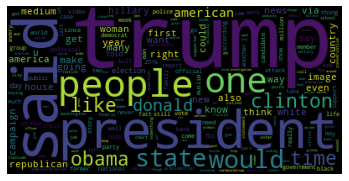

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fakecloud = WordCloud().generate_from_frequencies(frequency_dict_fake)
plt.imshow(fakecloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

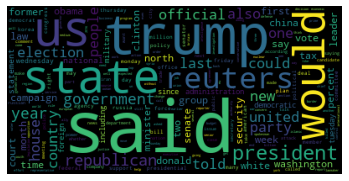

In [141]:
realcloud = WordCloud().generate_from_frequencies(frequency_dict_real)
plt.imshow(realcloud)
plt.axis('off')

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import naive_bayes
from sklearn.metrics import classification_report
from sklearn import metrics

import seaborn as sns     
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier

In [52]:
train_x, test_x, train_y, test_y  = train_test_split(df_all_news['text'],df_all_news['isFake'], test_size=0.2, random_state = 1)
print('train x:' +str(train_x.shape))
print('test x:' + str(test_x.shape))
print('train y:' + str(train_y.shape))
print('test y:'+ str(test_y.shape))

train x:(35413,)
test x:(8854,)
train y:(35413,)
test y:(8854,)


In [53]:
def getScore(model, train_x,test_x,train_y,test_y):
    model.fit(train_x, train_y)
    train_score = model.score(train_x, train_y)
    test_score = model.score(test_x, test_y)
    print('training score:' + str(train_score))
    print('testing score:' + str(test_score))

In [147]:
model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', naive_bayes.MultinomialNB())
])
getScore(model,train_x, test_x, train_y, test_y)


training score:0.944031852709457
testing score:0.9393494465778179


In [151]:
parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'vect__use_idf':[True,False]
             }
grid = GridSearchCV(model, parameters)
getScore(grid,train_x, test_x, train_y, test_y)



training score:0.9811933470759325
testing score:0.9661170092613508


In [153]:
best_params = grid.best_params_
print(best_params)

{'vect__ngram_range': (1, 3), 'vect__use_idf': True}


In [163]:
grid_result = pd.DataFrame(grid.cv_results_)[['param_vect__ngram_range','param_vect__use_idf','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]

In [164]:
print(grid_result)

  param_vect__ngram_range param_vect__use_idf  mean_test_score  \
0                  (1, 1)                True         0.936238   
1                  (1, 1)               False         0.940700   
2                  (1, 2)                True         0.954706   
3                  (1, 2)               False         0.949934   
4                  (1, 3)                True         0.963319   
5                  (1, 3)               False         0.955807   

   std_test_score  rank_test_score  mean_fit_time  mean_score_time  
0        0.002630                6      17.434729         4.310183  
1        0.003176                5      15.301187         3.840882  
2        0.003024                3      52.869752        10.597648  
3        0.002779                4      50.309198        10.072329  
4        0.002276                1     123.567844        17.559826  
5        0.002654                2     115.426080        17.710696  


In [192]:
best_tf_model = grid.best_estimator_
pred = best_tf_model.predict(test_x)

labels = ['real','fake']
tf_report = classification_report(test_y,pred,target_names=labels)
print(tf_report)

              precision    recall  f1-score   support

        real       0.97      0.96      0.96      4296
        fake       0.96      0.97      0.97      4558

    accuracy                           0.97      8854
   macro avg       0.97      0.97      0.97      8854
weighted avg       0.97      0.97      0.97      8854



C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[4114  182]
 [ 118 4440]]


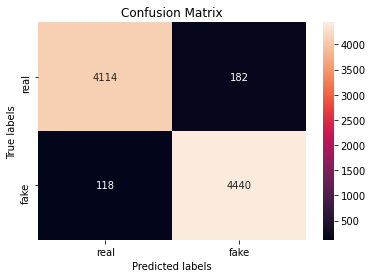

In [199]:

cm = metrics.confusion_matrix(test_y, pred, [0,1])
print(cm)


ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real','fake']);

In [54]:
#linguistic features
train_x, test_x, train_y, test_y  = train_test_split(df_all_news[['numExclaimsInTitle','allCapsInTitle','titleWordCount',
                                     'textWordCount','textSentenceCount','averageWordCountInSentence','readability','spellings_error',
                                     'lexicalDiversity','NounCount','VerbCount','PronounCount','AdjectiveCount','ConjunctionCount','ModalCount',
                                     'NumericCount','ProperNounCount','PastTenseCount','AdverbCount','ComparativeCount']],df_all_news['isFake'], test_size=0.2, random_state = 1)
print('train x:' +str(train_x.shape))
print('test x:' + str(test_x.shape))
print('train y:' + str(train_y.shape))
print('test y:'+ str(test_y.shape))

train x:(35413, 20)
test x:(8854, 20)
train y:(35413,)
test y:(8854,)


In [56]:

linguistic_model =  Pipeline([
    ('scaler', MinMaxScaler()),
    ('selector',SelectKBest(chi2)),
    ('clf', naive_bayes.MultinomialNB())
])
getScore(linguistic_model,train_x, test_x, train_y, test_y)


training score:0.6997147940022026
testing score:0.7027332279195844


In [57]:
linguistic_parameters = {
    'selector__k':[10,15,20]
             }
linguistic_grid = GridSearchCV(linguistic_model, linguistic_parameters)
getScore(linguistic_grid,train_x, test_x, train_y, test_y)

training score:0.8838562109959619
testing score:0.8837813417664333


In [58]:
linguistic_best_params = linguistic_grid.best_params_
print(linguistic_best_params)

{'selector__k': 20}


In [59]:
linguistic_grid_result = pd.DataFrame(linguistic_grid.cv_results_)[['param_selector__k','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]

In [60]:
print(linguistic_grid_result)

  param_selector__k  mean_test_score  std_test_score  rank_test_score  \
0                10         0.692712        0.004756                3   
1                15         0.700929        0.003854                2   
2                20         0.884026        0.000961                1   

   mean_fit_time  mean_score_time  
0       0.027727         0.001212  
1       0.021897         0.003124  
2       0.020504         0.009857  


In [201]:

linguistic_model = linguistic_grid.best_estimator_
pred = linguistic_model.predict(test_x)

In [185]:
from sklearn.metrics import classification_report
labels = ['real','fake']
linguistic_report = classification_report(test_y,pred,target_names=labels)
print(linguistic_report)


              precision    recall  f1-score   support

        real       0.84      0.94      0.89      4296
        fake       0.94      0.83      0.88      4558

    accuracy                           0.88      8854
   macro avg       0.89      0.89      0.88      8854
weighted avg       0.89      0.88      0.88      8854



C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[[4041  255]
 [ 774 3784]]


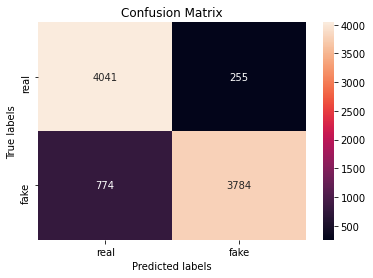

In [202]:
cm = metrics.confusion_matrix(test_y, pred, [0,1])
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real','fake']);

In [59]:
import textblob as tb

df_all_news['subjectivity'] = df_all_news['cleanupText'].apply(lambda x: tb.TextBlob(x).sentiment.subjectivity)
df_all_news['polarity'] = df_all_news['cleanupText'].apply(lambda x: tb.TextBlob(x).sentiment.polarity)

In [209]:
train_x, test_x, train_y, test_y  = train_test_split(df_all_news[['subjectivity','polarity']],df_all_news['isFake'], test_size=0.2, random_state = 0)
print('train x:' +str(train_x.shape))
print('test x:' + str(test_x.shape))
print('train y:' + str(train_y.shape))
print('test y:'+ str(test_y.shape))

sentiment_model =  Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', naive_bayes.MultinomialNB())
])
getScore(sentiment_model,train_x, test_x, train_y, test_y)

train x:(35413, 2)
test x:(8854, 2)
train y:(35413,)
test y:(8854,)
training score:0.5161663795781211
testing score:0.5163767788570138


In [217]:
#linguistic + sentiment
train_x, test_x, train_y, test_y  = train_test_split(df_all_news[['numExclaimsInTitle','allCapsInTitle','titleWordCount',
                                     'textWordCount','textSentenceCount','averageWordCountInSentence','readability','spellings_error',
                                     'lexicalDiversity','NounCount','VerbCount','PronounCount','AdjectiveCount','ConjunctionCount','ModalCount',
                                     'NumericCount','ProperNounCount','PastTenseCount','AdverbCount','ComparativeCount','subjectivity','polarity']],df_all_news['isFake'], test_size=0.2, random_state = 1)
print('train x:' +str(train_x.shape))
print('test x:' + str(test_x.shape))
print('train y:' + str(train_y.shape))
print('test y:'+ str(test_y.shape))

train x:(35413, 22)
test x:(8854, 22)
train y:(35413,)
test y:(8854,)


In [218]:
linguistic_sentiment_model =  Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', naive_bayes.MultinomialNB())
])
getScore(linguistic_sentiment_model,train_x, test_x, train_y, test_y)

training score:0.8878377996780843
testing score:0.8846848881861306


In [219]:
pred = linguistic_sentiment_model.predict(test_x)

              precision    recall  f1-score   support

        real       0.84      0.94      0.89      4296
        fake       0.94      0.83      0.88      4558

    accuracy                           0.88      8854
   macro avg       0.89      0.89      0.88      8854
weighted avg       0.89      0.88      0.88      8854

[[4041  255]
 [ 766 3792]]


C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


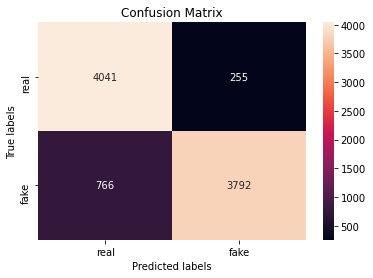

In [220]:
labels = ['real','fake']
linguistic_sentiment_report = classification_report(test_y,pred,target_names=labels)
print(linguistic_sentiment_report)
cm = metrics.confusion_matrix(test_y, pred, [0,1])
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real','fake']);

In [276]:
train_x, test_x, train_y, test_y  = train_test_split(df_all_news['text'],df_all_news['isFake'], test_size=0.2, random_state = 1)
tf_naive_model = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3))),
    ('clf', naive_bayes.MultinomialNB())
])
naive_parameters = {
    'clf__alpha':[0.5,0.7,1]
             }
naive_tf_grid = GridSearchCV(tf_naive_model, naive_parameters)
getScore(naive_tf_grid,train_x, test_x, train_y, test_y)
best_params = naive_tf_grid.best_params_

training score:0.947759297433146
testing score:0.9419471425344477


In [279]:
print(best_params)
naive_tf_grid_result = pd.DataFrame(naive_tf_grid.cv_results_)[['param_clf__alpha','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(naive_tf_grid_result)

{'clf__alpha': 0.5}
  param_clf__alpha  mean_test_score  std_test_score  rank_test_score  \
0              0.5         0.937452        0.002931                1   
1              0.7         0.936690        0.002939                2   
2                1         0.936238        0.002630                3   

   mean_fit_time  mean_score_time  
0      17.014908         4.141881  
1      17.006277         4.139370  
2      17.231763         4.201598  


In [52]:
def getClassificationReport(grid,text_x,test_y):
    model = grid.best_estimator_
    pred = model.predict(test_x)
    labels = ['real','fake']
    report = classification_report(test_y,pred,target_names=labels)
    print(report)
    cm = metrics.confusion_matrix(test_y, pred, [0,1])
    print(cm)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real','fake']);
    

              precision    recall  f1-score   support

        real       0.94      0.94      0.94      4296
        fake       0.94      0.95      0.94      4558

    accuracy                           0.94      8854
   macro avg       0.94      0.94      0.94      8854
weighted avg       0.94      0.94      0.94      8854

[[4020  276]
 [ 238 4320]]


C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


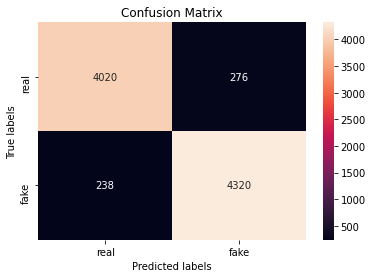

In [282]:
getClassificationReport(naive_tf_grid,test_x,test_y)

In [76]:
train_x, test_x, train_y, test_y  = train_test_split(df_all_news['text'],df_all_news['isFake'], test_size=0.2, random_state = 1)
from sklearn.linear_model import LogisticRegression
tf_logistic_model = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3))),
    ('clf', LogisticRegression())
])

logistic_params = {
    'clf__C':[0.1,1,10]
             
}

   
logistic_tf_grid = GridSearchCV(tf_logistic_model, logistic_params,cv=3)
getScore(logistic_tf_grid,train_x, test_x, train_y, test_y)
best_params = logistic_tf_grid.best_params_
logistic_tf_grid_result = pd.DataFrame(logistic_tf_grid.cv_results_)[['param_clf__C','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(logistic_tf_grid_result)


training score:0.9998588089119814
testing score:0.9922069121301107
  param_clf__C  mean_test_score  std_test_score  rank_test_score  \
0          0.1         0.965154        0.001073                3   
1            1         0.981250        0.000423                2   
2           10         0.989100        0.000519                1   

   mean_fit_time  mean_score_time  
0     138.615657        34.365825  
1     169.000136        32.680727  
2     173.524569        33.169159  


              precision    recall  f1-score   support

        real       0.99      0.99      0.99      4296
        fake       0.99      0.99      0.99      4558

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854

[[4265   31]
 [  38 4520]]


C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


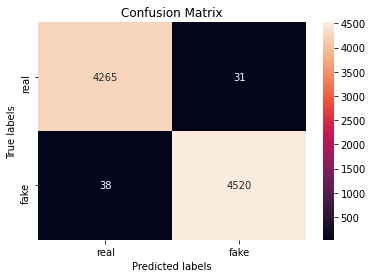

In [55]:
import matplotlib.pyplot as plt
getClassificationReport(logistic_tf_grid,test_x,test_y)

training score:0.9999717617823963
testing score:0.9975152473458324
  param_clf__criterion param_clf__max_depth  mean_test_score  std_test_score  \
0                 gini                   10         0.996160        0.000787   
1                 gini                   20         0.996103        0.000553   
2                 gini                   30         0.996640        0.000211   
3              entropy                   10         0.995934        0.000667   
4              entropy                   20         0.995849        0.000599   
5              entropy                   30         0.995849        0.000599   

   rank_test_score  mean_fit_time  mean_score_time  
0                2     197.441119        28.712601  
1                3     264.783095        27.175078  
2                1     164.351037        15.641570  
3                4     166.766093        21.256617  
4                5     178.657147        20.155299  
5                5     130.751975        14.376711  
 

C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


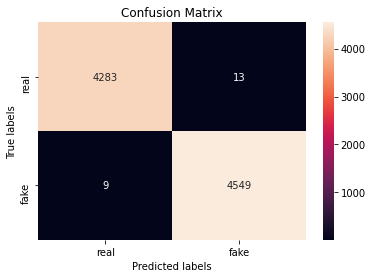

In [56]:
from sklearn import tree
tf_decision_model = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3))),
    ('clf', tree.DecisionTreeClassifier())
])

decision_params = {
    'clf__criterion':['gini','entropy'],
    'clf__max_depth':[10,20,30]
             
}

decision_tf_grid = GridSearchCV(tf_decision_model, decision_params,cv=3)
getScore(decision_tf_grid,train_x, test_x, train_y, test_y)
best_params = decision_tf_grid.best_params_
decision_tf_grid_result = pd.DataFrame(decision_tf_grid.cv_results_)[['param_clf__criterion','param_clf__max_depth','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(decision_tf_grid_result)
getClassificationReport(decision_tf_grid,test_x,test_y)

training score:0.9828594019145511
testing score:0.9643099164219562
  param_clf__criterion param_clf__max_depth  mean_test_score  std_test_score  \
0                 gini                   10         0.950640        0.008090   
1                 gini                   20         0.965069        0.001301   
2                 gini                   30         0.972778        0.002475   
3              entropy                   10         0.945444        0.001450   
4              entropy                   20         0.970293        0.001282   
5              entropy                   30         0.968317        0.001097   

   rank_test_score  mean_fit_time  mean_score_time  
0                5      63.256630        32.539955  
1                4      80.946529        31.427184  
2                1     101.037195        31.557189  
3                6      64.064318        30.657297  
4                2      75.072986        28.663463  
5                3      89.204869        27.586966  
 

C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


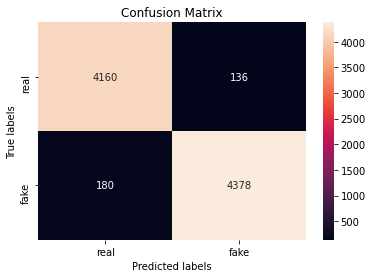

In [57]:
from sklearn.ensemble import RandomForestClassifier
tf_random_model = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3))),
    ('clf', RandomForestClassifier())
])

random_params = {
    'clf__criterion':['gini','entropy'],
    'clf__max_depth':[10,20,30]
             
}

random_tf_grid = GridSearchCV(tf_random_model, random_params,cv=3)
getScore(random_tf_grid,train_x, test_x, train_y, test_y)
best_params = random_tf_grid.best_params_
random_tf_grid_result = pd.DataFrame(random_tf_grid.cv_results_)[['param_clf__criterion','param_clf__max_depth','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(random_tf_grid_result)
getClassificationReport(random_tf_grid,test_x,test_y)

In [77]:
from sklearn.svm import LinearSVC
tf_linearSVC_model = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3))),
    ('clf', LinearSVC())
])

linearSVC_params = {
    'clf__C':[0.1,1,10] 
             
}

   
linearSVC_tf_grid = GridSearchCV(tf_linearSVC_model, linearSVC_params)
getScore(linearSVC_tf_grid,train_x, test_x, train_y, test_y)
best_params = linearSVC_tf_grid.best_params_


training score:1.0
testing score:0.9948046080867404


  param_clf__C  mean_test_score  std_test_score  rank_test_score  \
0          0.1         0.986304        0.000726                3   
1            1         0.992658        0.000489                2   
2           10         0.993533        0.000588                1   

   mean_fit_time  mean_score_time  
0     130.864672        18.909159  
1     137.608356        18.799690  
2     176.660813        18.206113  
              precision    recall  f1-score   support

        real       0.99      1.00      0.99      4296
        fake       1.00      0.99      0.99      4558

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854

[[4282   14]
 [  32 4526]]


C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


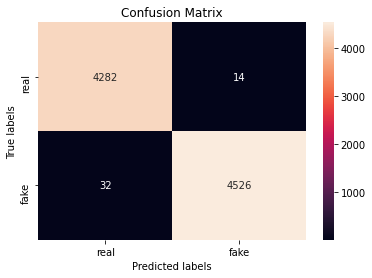

In [296]:
linearSVC_tf_grid_result = pd.DataFrame(linearSVC_tf_grid.cv_results_)[['param_clf__C','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(linearSVC_tf_grid_result)
getClassificationReport(linearSVC_tf_grid,test_x,test_y)

training score:0.9966961285403665
testing score:0.9907386491981025
  param_clf__alpha  mean_test_score  std_test_score  rank_test_score  \
0           0.0001         0.990371        0.000671                1   
1           0.0010         0.965493        0.001321                2   
2           0.1000         0.516957        0.000771                3   

   mean_fit_time  mean_score_time  
0     134.747392        19.670735  
1     112.735241        18.608666  
2     118.839315        16.582210  
              precision    recall  f1-score   support

        real       0.99      0.99      0.99      4296
        fake       0.99      0.99      0.99      4558

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854

[[4265   31]
 [  51 4507]]


C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


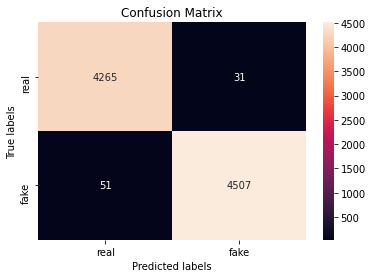

In [293]:
from sklearn.linear_model import SGDClassifier
tf_sgd_model = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1,3))),
    ('clf', SGDClassifier())
])

sgd_params = {
    'clf__alpha':[0.0001,0.001,0.1]
             
}

   
sgd_tf_grid = GridSearchCV(tf_sgd_model, sgd_params)
getScore(sgd_tf_grid,train_x, test_x, train_y, test_y)
best_params = sgd_tf_grid.best_params_
sgd_tf_grid_result = pd.DataFrame(sgd_tf_grid.cv_results_)[['param_clf__alpha','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(sgd_tf_grid_result)
getClassificationReport(sgd_tf_grid,test_x,test_y)

In [60]:
train_x, test_x, train_y, test_y  = train_test_split(df_all_news[['numExclaimsInTitle','allCapsInTitle','titleWordCount',
                                     'textWordCount','textSentenceCount','averageWordCountInSentence','readability','spellings_error',
                                     'lexicalDiversity','NounCount','VerbCount','PronounCount','AdjectiveCount','ConjunctionCount','ModalCount',
                                     'NumericCount','ProperNounCount','PastTenseCount','AdverbCount','ComparativeCount','subjectivity','polarity']],df_all_news['isFake'], test_size=0.2, random_state = 1)

training score:0.8878377996780843
testing score:0.8845719448836684
  param_clf__alpha  mean_test_score  std_test_score  rank_test_score  \
0              0.5         0.887922        0.001979                1   
1              0.7         0.887922        0.002003                1   
2                1         0.887922        0.001985                1   

   mean_fit_time  mean_score_time  
0       0.046653         0.002194  
1       0.039102         0.003152  
2       0.045580         0.006434  
              precision    recall  f1-score   support

        real       0.84      0.94      0.89      4296
        fake       0.94      0.83      0.88      4558

    accuracy                           0.88      8854
   macro avg       0.89      0.89      0.88      8854
weighted avg       0.89      0.88      0.88      8854

[[4040  256]
 [ 766 3792]]


C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


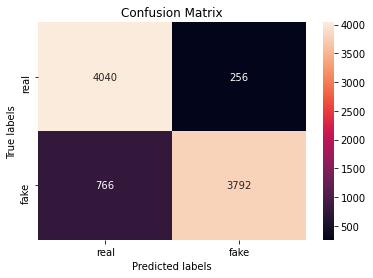

In [61]:
linguistic_naive_model =  Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', naive_bayes.MultinomialNB())
])
naive_parameters = {
    'clf__alpha':[0.5,0.7,1]
             }
naive_linguistic_grid = GridSearchCV(linguistic_naive_model, naive_parameters)
getScore(naive_linguistic_grid,train_x, test_x, train_y, test_y)
best_params = naive_linguistic_grid.best_params_
naive_linguistic_grid_result = pd.DataFrame(naive_linguistic_grid.cv_results_)[['param_clf__alpha','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(naive_linguistic_grid_result)
getClassificationReport(naive_linguistic_grid,test_x,test_y)

training score:0.9258182023550674
testing score:0.9260221368872826
  param_clf__alpha  mean_test_score  std_test_score  rank_test_score  \
0           0.0001         0.918335        0.008503                1   
1           0.0010         0.905854        0.002629                2   
2           0.1000         0.516562        0.000033                3   

   mean_fit_time  mean_score_time  
0       0.069545         0.009357  
1       0.056230         0.006270  
2       0.064611         0.003124  
              precision    recall  f1-score   support

        real       0.89      0.96      0.93      4296
        fake       0.96      0.89      0.93      4558

    accuracy                           0.93      8854
   macro avg       0.93      0.93      0.93      8854
weighted avg       0.93      0.93      0.93      8854

[[4132  164]
 [ 491 4067]]


C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


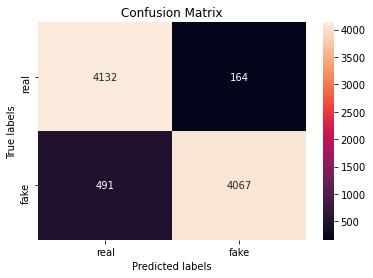

In [63]:
linguistic_sgd_model =  Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', SGDClassifier())
])
sgd_params = {
    'clf__alpha':[0.0001,0.001,0.1]
             
}

sgd_linguistic_grid = GridSearchCV(linguistic_sgd_model, sgd_params)
getScore(sgd_linguistic_grid,train_x, test_x, train_y, test_y)
best_params = sgd_linguistic_grid.best_params_
sgd_linguistic_grid_result = pd.DataFrame(sgd_linguistic_grid.cv_results_)[['param_clf__alpha','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(sgd_linguistic_grid_result)
getClassificationReport(sgd_linguistic_grid,test_x,test_y)

C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.p

training score:0.9377347301838308
testing score:0.9378811836458099
  param_clf__C  mean_test_score  std_test_score  rank_test_score  \
0          0.1         0.927060        0.004386                3   
1            1         0.936040        0.003629                2   
2           10         0.937565        0.003163                1   

   mean_fit_time  mean_score_time  
0       0.094138         0.015618  
1       0.359965         0.005784  
2       1.639979         0.012475  
              precision    recall  f1-score   support

        real       0.92      0.96      0.94      4296
        fake       0.96      0.92      0.94      4558

    accuracy                           0.94      8854
   macro avg       0.94      0.94      0.94      8854
weighted avg       0.94      0.94      0.94      8854

[[4112  184]
 [ 366 4192]]


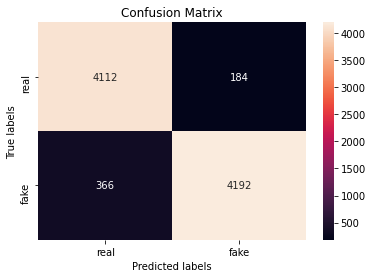

In [66]:
from sklearn.svm import LinearSVC
linguistic_linearSVC_model =  Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', LinearSVC())
])
linearSVC_params = {
    'clf__C':[0.1,1,10] 
             
}

linearSVC_linguistic_grid = GridSearchCV(linguistic_linearSVC_model, linearSVC_params)
getScore(linearSVC_linguistic_grid,train_x, test_x, train_y, test_y)
best_params = linearSVC_linguistic_grid.best_params_
linearSVC_linguistic_grid_result = pd.DataFrame(linearSVC_linguistic_grid.cv_results_)[['param_clf__C','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(linearSVC_linguistic_grid_result)
getClassificationReport(linearSVC_linguistic_grid,test_x,test_y)

C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

training score:0.9371699658317567
testing score:0.9365258640162638
  param_clf__C  mean_test_score  std_test_score  rank_test_score  \
0          0.1         0.907802        0.002205                3   
1            1         0.925705        0.003606                2   
2           10         0.936887        0.003313                1   

   mean_fit_time  mean_score_time  
0       0.225957         0.009454  
1       0.476158         0.008860  
2       0.501153         0.012459  
              precision    recall  f1-score   support

        real       0.92      0.96      0.94      4296
        fake       0.96      0.92      0.94      4558

    accuracy                           0.94      8854
   macro avg       0.94      0.94      0.94      8854
weighted avg       0.94      0.94      0.94      8854

[[4111  185]
 [ 377 4181]]


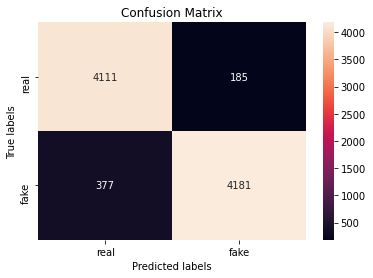

In [68]:
linguistic_logistic_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression())
])

logistic_params = {
    'clf__C':[0.1,1,10]
             
}

logistic_linguistic_grid = GridSearchCV(linguistic_logistic_model, logistic_params)
getScore(logistic_linguistic_grid,train_x, test_x, train_y, test_y)
best_params = logistic_linguistic_grid.best_params_
logistic_linguistic_grid_result = pd.DataFrame(logistic_linguistic_grid.cv_results_)[['param_clf__C','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(logistic_linguistic_grid_result)
getClassificationReport(logistic_linguistic_grid,test_x,test_y)

training score:0.9996893796063593
testing score:0.9508696634289586
  param_clf__criterion param_clf__max_depth  mean_test_score  std_test_score  \
0                 gini                   10         0.939740        0.003592   
1                 gini                   20         0.941321        0.001584   
2                 gini                   30         0.940643        0.002659   
3              entropy                   10         0.939965        0.003106   
4              entropy                   20         0.942761        0.002591   
5              entropy                   30         0.941321        0.001721   

   rank_test_score  mean_fit_time  mean_score_time  
0                6       0.302843         0.011478  
1                2       0.456021         0.002006  
2                4       0.488855         0.006160  
3                5       0.346448         0.006939  
4                1       0.406535         0.005508  
5                3       0.422271         0.005358  
 

C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


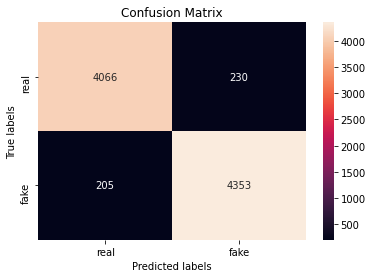

In [70]:
linguistic_decision_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', tree.DecisionTreeClassifier())
])

decision_params = {
    'clf__criterion':['gini','entropy'],
    'clf__max_depth':[10,20,30]
}
     

decision_linguistic_grid = GridSearchCV(linguistic_decision_model, decision_params)
getScore(decision_linguistic_grid,train_x, test_x, train_y, test_y)
best_params = decision_linguistic_grid.best_params_
decision_linguistic_grid_result = pd.DataFrame(decision_linguistic_grid.cv_results_)[['param_clf__criterion','param_clf__max_depth','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(decision_linguistic_grid_result)
getClassificationReport(decision_linguistic_grid,test_x,test_y)

training score:1.0
testing score:0.9675852721933589
  param_clf__criterion param_clf__max_depth  mean_test_score  std_test_score  \
0                 gini                   10         0.957106        0.003690   
1                 gini                   20         0.968853        0.002248   
2                 gini                   30         0.969616        0.001901   
3              entropy                   10         0.958603        0.004242   
4              entropy                   20         0.969503        0.002704   
5              entropy                   30         0.969418        0.002080   

   rank_test_score  mean_fit_time  mean_score_time  
0                6       4.227569         0.105206  
1                4       5.842519         0.124944  
2                1       5.567603         0.114143  
3                5       4.410185         0.089231  
4                2       5.489340         0.092961  
5                3       5.851689         0.116440  
              pr

C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


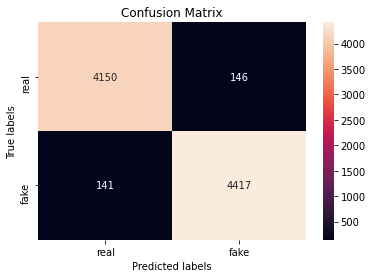

In [71]:
linguistic_random_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier())
])

random_params = {
    'clf__criterion':['gini','entropy'],
    'clf__max_depth':[10,20,30]
             
}
random_linguistic_grid = GridSearchCV(linguistic_random_model, random_params)
getScore(random_linguistic_grid,train_x, test_x, train_y, test_y)
best_params = random_linguistic_grid.best_params_
random_linguistic_grid_result = pd.DataFrame(random_linguistic_grid.cv_results_)[['param_clf__criterion','param_clf__max_depth','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(random_linguistic_grid_result)
getClassificationReport(random_linguistic_grid,test_x,test_y)

In [73]:
df_all_news['cleanupTitle'] = preprocessing(df_all_news['title'])

train_x, test_x, train_y, test_y  = train_test_split(df_all_news['cleanupTitle'],df_all_news['isFake'], test_size=0.2, random_state = 1)
print('train x:' +str(train_x.shape))
print('test x:' + str(test_x.shape))
print('train y:' + str(train_y.shape))
print('test y:'+ str(test_y.shape))

model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', naive_bayes.MultinomialNB())
])
getScore(model,train_x, test_x, train_y, test_y)

parameters = {
    'vect__ngram_range':[(1,1),(1,2),(1,3)],
    'vect__use_idf':[True,False],
    'clf__alpha':[0.5,0.7,1]
             }
title_grid = GridSearchCV(model, parameters)
getScore(title_grid,train_x, test_x, train_y, test_y)


<ipython-input-45-21c257195a10>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  return col.apply(lambda x: nltk.word_tokenize(x)) \


train x:(35413,)
test x:(8854,)
train y:(35413,)
test y:(8854,)
training score:0.9518820772032869
testing score:0.9393494465778179
training score:0.9974020839804592
testing score:0.9532414727806641


   param_vect__ngram_range param_vect__use_idf param_clf__alpha  \
0                   (1, 1)                True              0.5   
1                   (1, 1)               False              0.5   
2                   (1, 2)                True              0.5   
3                   (1, 2)               False              0.5   
4                   (1, 3)                True              0.5   
5                   (1, 3)               False              0.5   
6                   (1, 1)                True              0.7   
7                   (1, 1)               False              0.7   
8                   (1, 2)                True              0.7   
9                   (1, 2)               False              0.7   
10                  (1, 3)                True              0.7   
11                  (1, 3)               False              0.7   
12                  (1, 1)                True                1   
13                  (1, 1)               False                

C:\Users\share\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


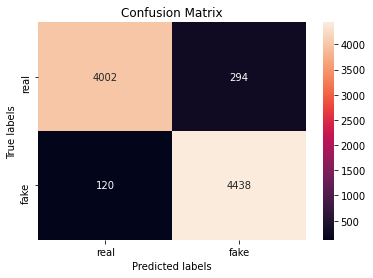

In [74]:
best_params = title_grid.best_params_
title_grid_result = pd.DataFrame(title_grid.cv_results_)[['param_vect__ngram_range','param_vect__use_idf','param_clf__alpha','mean_test_score','std_test_score',
                                               'rank_test_score','mean_fit_time','mean_score_time']]
print(title_grid_result)
getClassificationReport(title_grid,test_x,test_y)